# Store Sales 

In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read all data
train_data = pd.read_csv('train.csv')
oil_data = pd.read_csv('oil.csv')
stores_data = pd.read_csv('stores.csv')
holidays_events_data = pd.read_csv('holidays_events.csv')
transactions_data = pd.read_csv('transactions.csv')

## 1. Data inspection

In [3]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [5]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
holidays_events_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [7]:
transactions_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [8]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


## 2. Data analysis

* There are different familys of goods, different store and whether it is on promotion or not
* Stores has location and type, there is also another cluster which is a grouping of similar stores
* Daily Oil price would impact sales performance and there are missing data
* Holidays and events can be transfered
* Wages are paid every 2 weeks and this would impact sales
* earth quake on April 16th, 2016
* certain type of stores might only have certain family of goods, hence the 0 values

In [9]:
date_range = train_data['date']
family_of_goods = train_data['family']
store_number = train_data['store_nbr']

In [10]:
date_range = date_range.sort_values().drop_duplicates().reset_index(drop=True)
family_of_goods = family_of_goods.sort_values().drop_duplicates().reset_index(drop=True)
store_number = store_number.sort_values().drop_duplicates().reset_index(drop=True)

### 2.1 Look at date range, family of goods and number of stores

In [11]:
date_range

0       2013-01-01
1       2013-01-02
2       2013-01-03
3       2013-01-04
4       2013-01-05
           ...    
1679    2017-08-11
1680    2017-08-12
1681    2017-08-13
1682    2017-08-14
1683    2017-08-15
Name: date, Length: 1684, dtype: object

In [12]:
family_of_goods

0                     AUTOMOTIVE
1                      BABY CARE
2                         BEAUTY
3                      BEVERAGES
4                          BOOKS
5                   BREAD/BAKERY
6                    CELEBRATION
7                       CLEANING
8                          DAIRY
9                           DELI
10                          EGGS
11                  FROZEN FOODS
12                     GROCERY I
13                    GROCERY II
14                      HARDWARE
15            HOME AND KITCHEN I
16           HOME AND KITCHEN II
17               HOME APPLIANCES
18                     HOME CARE
19                    LADIESWEAR
20               LAWN AND GARDEN
21                      LINGERIE
22              LIQUOR,WINE,BEER
23                     MAGAZINES
24                         MEATS
25                 PERSONAL CARE
26                  PET SUPPLIES
27       PLAYERS AND ELECTRONICS
28                       POULTRY
29                PREPARED FOODS
30        

In [13]:
store_number

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
31    32
32    33
33    34
34    35
35    36
36    37
37    38
38    39
39    40
40    41
41    42
42    43
43    44
44    45
45    46
46    47
47    48
48    49
49    50
50    51
51    52
52    53
53    54
Name: store_nbr, dtype: int64

### 2.2 Data processing

In [14]:
# join the train_data with stores data on store number
train_store_data = pd.merge(train_data, stores_data, on='store_nbr')
train_store_data.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [15]:
# get holiday data on train stored data
train_store_data['on_holiday'] = False
for index, row in holidays_events_data.iterrows():
    # For each row, first check if date is in date range
    if row['date'] in date_range.values:
        # if it is not transfered (it is celebrated):
        if not row['transferred']:
            # if it is a national holiday
            if row['locale'] == 'National':
                train_store_data.loc[train_store_data['date'] == row['date'], 'on_holiday'] = True
            # if it is a regional holiday
            elif row['locale'] == 'Regional':
                c1 = train_store_data['date'] == row['date']
                c2 = train_store_data['state'] == row['locale_name']
                c = c1 & c2
                train_store_data.loc[c, 'on_holiday'] = True
            # if it is a local holiday
            elif row['locale'] == 'Local':
                c1 = train_store_data['date'] == row['date']
                c2 = train_store_data['city'] == row['locale_name']
                c = c1 & c2
                train_store_data.loc[c, 'on_holiday'] = True
                
                
                
    

In [16]:
train_store_data.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,on_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,True
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,True
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,True
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,True
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,True


Now let's plot some sales figure against time

In [17]:
'''
function to plot sales against time for a type of good for a store for a given range
'''
def plot_sales_of_good_for_store(family, store, start, end):
    data = train_store_data.loc[train_store_data['family'] == family]
    data = data.loc[data['store_nbr'] == store]
    data = data.reset_index(drop=True)
    time = pd.to_datetime(data['date'])
    start_index = len(time[time < pd.to_datetime(start)])
    end_index = len(time[time < pd.to_datetime(end)]) + 1
    holiday_data = data.iloc[:, start_index:end_index]
    holiday_data = holiday_data.loc[holiday_data['on_holiday'] == True]
    holiday_time = pd.to_datetime(holiday_data['date'])
    fig, ax = plt.subplots(figsize=(14,5))
    plt.plot(time[start_index:end_index], data['sales'][start_index:end_index], 'bo')
    plt.plot(holiday_time, holiday_data['sales'], 'ro')
    plt.xlabel('Time')
    plt.ylabel('Sales')
    plt.grid(True)
    plt.title(f'Store: {store}, family: {family}, start: {start}, end: {end}')
    plt.show()
    plt.close()
    

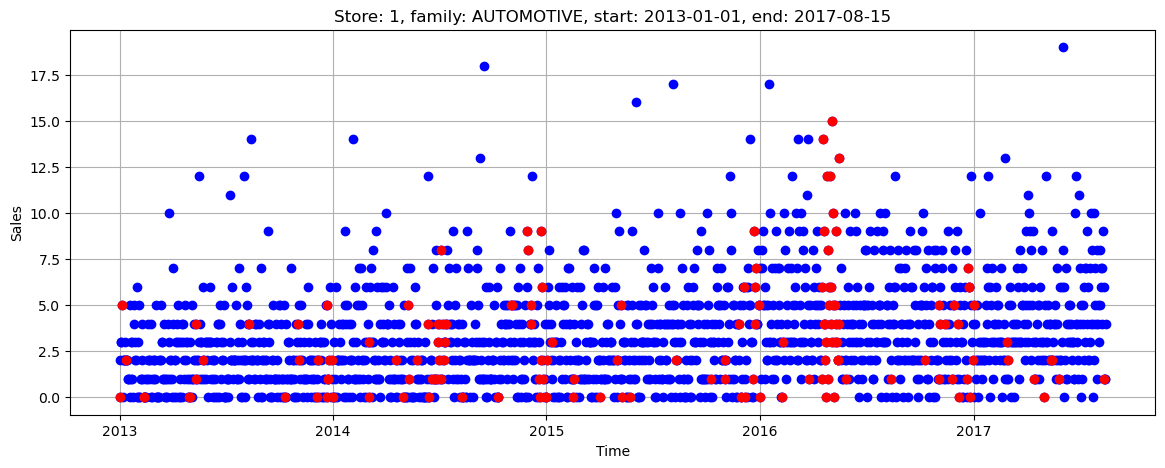

In [18]:
plot_sales_of_good_for_store('AUTOMOTIVE', 1, '2013-01-01', '2017-08-15')

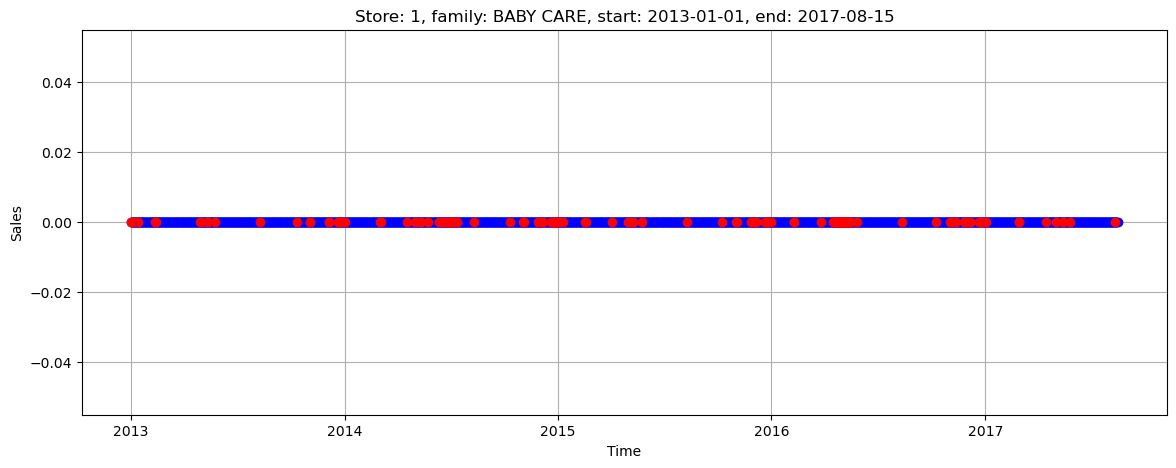

In [19]:
plot_sales_of_good_for_store('BABY CARE', 1, '2013-01-01', '2017-08-15')

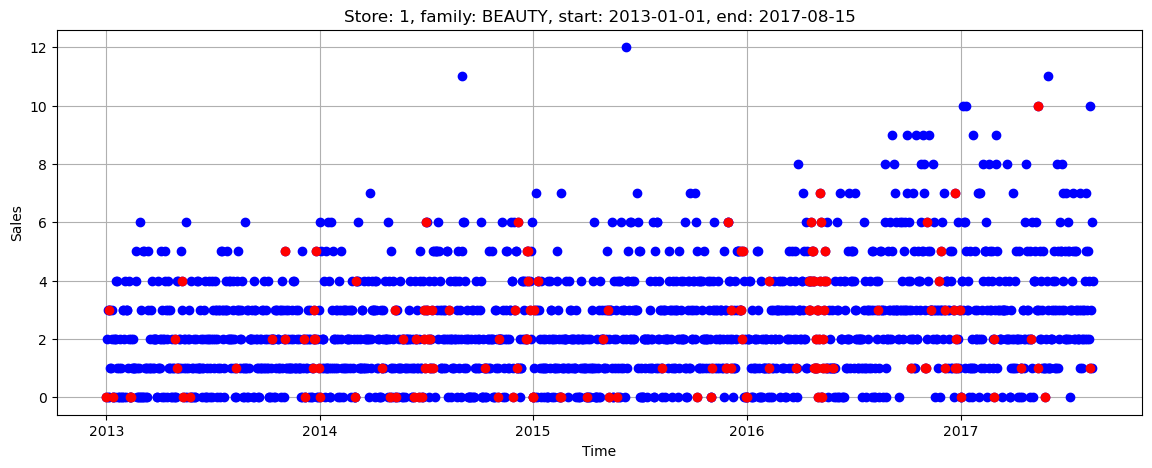

In [20]:
plot_sales_of_good_for_store('BEAUTY', 1, '2013-01-01', '2017-08-15')

Now look at transaction data with sales, the transaction data table contains the total transactions of a store in a particular day, there are missing date in the transactions data, the missing date are different for different stores.

In [21]:
transactions_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [28]:
# fill the missing data with zeros
df = pd.merge(pd.DataFrame(date_range), pd.DataFrame(store_number), how='cross')
transactions_filled = pd.merge(df, transactions_data, on=['date','store_nbr'], how='left')
transactions_filled = transactions_filled.fillna(0)
transactions_filled.head()

,date,store_nbr,transactions
0,2013-01-01,1,0.0
1,2013-01-01,2,0.0
2,2013-01-01,3,0.0
3,2013-01-01,4,0.0
4,2013-01-01,5,0.0


In [43]:
# join with the holiday data
holiday_store_df = train_store_data[['date','store_nbr','on_holiday']].drop_duplicates(ignore_index=True)
transactions_filled_holiday = pd.merge(transactions_filled, holiday_store_df,on=['date','store_nbr'])
transactions_filled_holiday.head()

,date,store_nbr,transactions,on_holiday
0,2013-01-01,1,0.0,True
1,2013-01-01,2,0.0,True
2,2013-01-01,3,0.0,True
3,2013-01-01,4,0.0,True
4,2013-01-01,5,0.0,True


In [45]:
def plot_transactions_for_store(store, start, end):
    data = transactions_filled_holiday.loc[transactions_filled_holiday['store_nbr'] == store]
    data = data.reset_index(drop=True)
    time = pd.to_datetime(data['date'])
    start_index = len(time[time < pd.to_datetime(start)])
    end_index = len(time[time < pd.to_datetime(end)]) + 1
    holiday_data = data.iloc[:, start_index:end_index]
    holiday_data = holiday_data.loc[holiday_data['on_holiday'] == True]
    holiday_time = pd.to_datetime(holiday_data['date'])
    fig, ax = plt.subplots(figsize=(14,5))
    plt.plot(time, data['transactions'], 'bo')
    plt.plot(holiday_time, holiday_data['transactions'], 'ro')
    plt.xlabel("Time")
    plt.ylabel("Transactions")
    plt.grid(True)
    plt.show()
    plt.close()

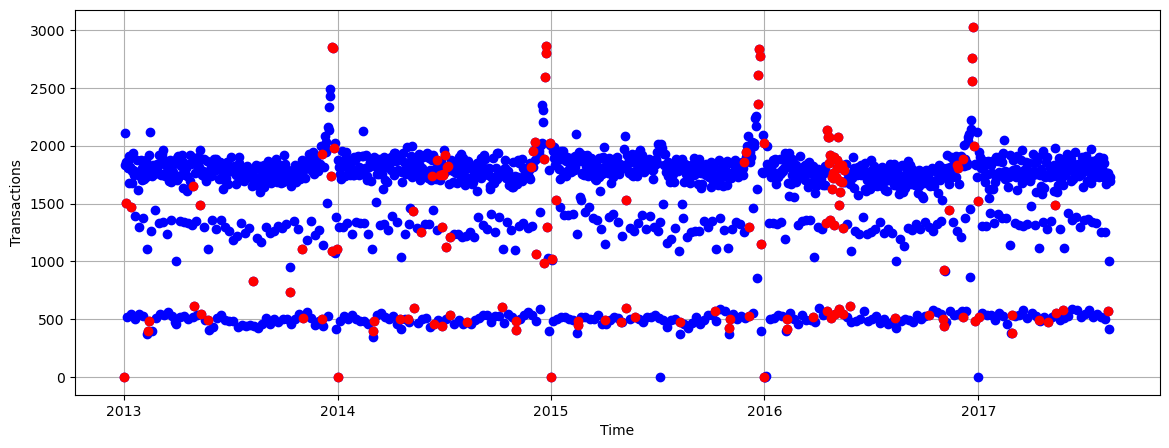

In [46]:
plot_transactions_for_store(1, '2013-01-01', '2017-08-15')